In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
%matplotlib inline

In [52]:
from functools import *
from itertools import product, permutations
from random import shuffle, choice

In [159]:
class StableMarriageOutput:
    @staticmethod
    def randomly_pair(n):
        x = list(range(n))
        y = list(range(n))
        shuffle(y)
        return StableMarriageOutput(list(zip(x, y)))
    def __init__(self, pairings):
        self.__pairings = pairings
    def man_for(self, woman):
        for m, w in self.__pairings:
            if w == woman: return m
        raise RuntimeError("No man for %s in %s" % (w, self))
    def woman_for(self, man):
        for m, w in self.__pairings:
            if m == man: return w
        raise RuntimeError("No woman for %s in %s" % (m, self))
    def find_rogue_couples(self, inpu):
        for m, w in product([m for m, w in self.__pairings], [w for m, w in self.__pairings]):
            if inpu.rogue_couple(self, m, w):
                yield m, w
    def swap_couple(self, m, w):
        values = []
        m_star, w_star = None, None
        for m2, w2 in self.__pairings:
            if m2 == m:
                w_star = w2
            if w2 == w:
                m_star = m2
            if m2 != m and w2 != w:
                values.append((m2, w2))
        assert (m_star is not None) and (w_star is not None)
        print(m, w, m_star, w_star)
        assert m_star != m and w_star != w
        values.append((m, w))
        values.append((m_star, w_star))
        return StableMarriageOutput(values)
    def __repr__(self):
        return "StableMarriageOutput(%s)" % self.__pairings

In [160]:
def sma(inp):
    print(inp)
    output = StableMarriageOutput.randomly_pair(len(inp))
    steps = 0
    while steps < 100:
        rogues = list(output.find_rogue_couples(inp))
        if len(rogues) == 0:
            return steps
        m, w = choice(rogues)
        print(output, list(output.find_rogue_couples(inp)))
        output = output.swap_couple(m, w)
        steps += 1
    raise RuntimeError("FAILED TO TERMINATE: %s"%output)

In [161]:
def statistical_sma(inp, times):
    vals = []
    for _ in range(times):
        vals.append(sma(inp))
    return vals, np.mean(vals), np.std(vals)

In [162]:
def means(n, times, input_times):
    results = [statistical_sma(i, times) for i in StableMarriageInput.random_inputs(n, input_times)]
    return [r[1] for r in results], [r[2] for r in results]

In [166]:
m, s = means(3, 20, 5)

StableMarriageInput([Preferences([0, 1, 2]), Preferences([2, 0, 1]), Preferences([2, 0, 1])], [Preferences([0, 1, 2]), Preferences([2, 0, 1]), Preferences([2, 1, 0])])
StableMarriageInput([Preferences([0, 1, 2]), Preferences([2, 0, 1]), Preferences([2, 0, 1])], [Preferences([0, 1, 2]), Preferences([2, 0, 1]), Preferences([2, 1, 0])])
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 0 0 0
0 0 ASDF False
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 0 2 0
2 0 ASDF True
0 1 ASDF True
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 0 1 0
1 0 ASDF True
0 2 ASDF True
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 1 0 2
0 2 ASDF True
1 0 ASDF True
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 1 2 2
2 2 ASDF False
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 1 1 2
1 2 ASDF False
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 2 0 1
0 1 ASDF True
2 0 ASDF True
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 2 2 1
2 1 ASDF True
2 1 ASDF False
StableMarriageOutput([(0, 0), (1, 2), (2, 1)]) 2 1 1
1

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.95,  1.01,  1.07,  1.13,  1.19,  1.25,  1.31,  1.37,  1.43,
         1.49,  1.55]),
 <a list of 10 Patch objects>)

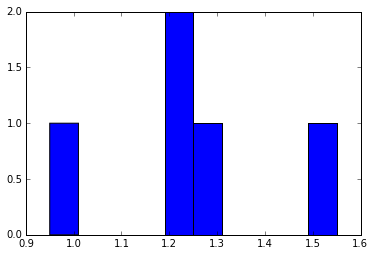

In [167]:
plt.hist(m)

(array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 0.64031242,  0.65752157,  0.67473071,  0.69193985,  0.70914899,
         0.72635813,  0.74356727,  0.76077642,  0.77798556,  0.7951947 ,
         0.81240384]),
 <a list of 10 Patch objects>)

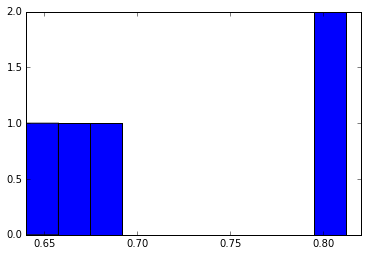

In [168]:
plt.hist(s)